# Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:
The conditional probability for class being C1 given x would range from 0 to 1. At $P(C_1|x) = 0$ we'd have cost associated as 2 which linearly decreases to 0 at $P(C_1|x) = 1$

This implies at $P(C_1|x) = 0.5$ we'd hit cost as 1 equal to the given reject rate. Given it's a binary classification problem, we have analogous to above cost of misclassifying class 2 records as 0 at $P(C_1|x) = 0$ and as 4 at $P(C_1|x) = 1$. This line would hit cost of 1 equal to the reject rate at $P(C_1|x) = 0.25$

Thereby we have three regions in terms of $P(C_1|x)$ :
- [0 , 0.25) : Predict class C2
- [0.25 , 0.5) : Reject 
- [0.5 , 1] : Predict class C1

## Answer:

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [ ]:
a=1

In [1]:
import numpy as np
import pandas as pd

data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

## Answer:

In [2]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train , y_train)
#Test score
score = clf.score(X_train, y_train)
print('Train accuracy : ',score)
#Test score
score = clf.score(X_test, y_test)
print('Test accuracy : ',score)

Train accuracy :  0.7133333333333334
Test accuracy :  0.69


In [3]:
#Train metrics
from sklearn.metrics import classification_report
cr = classification_report(clf.predict(X_train) , y_train , output_dict=True)
pd.DataFrame(cr).transpose()

/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
False,1.000000,0.713333,0.832685,300.000000
True,0.000000,0.000000,0.000000,0.000000
accuracy,0.713333,0.713333,0.713333,0.713333
macro avg,0.500000,0.356667,0.416342,300.000000
weighted avg,1.000000,0.713333,0.832685,300.000000


In [4]:
#Test metrics
cr = classification_report(clf.predict(X_test) , y_test , output_dict=True)
pd.DataFrame(cr).transpose()

/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
False,1.00,0.690,0.816568,100.00
True,0.00,0.000,0.000000,0.00
accuracy,0.69,0.690,0.690000,0.69
macro avg,0.50,0.345,0.408284,100.00
weighted avg,1.00,0.690,0.816568,100.00


## Answer : Part b

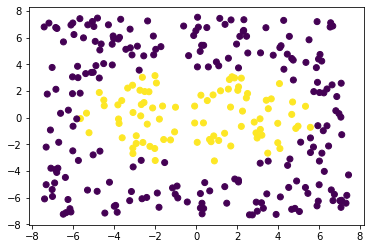

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

Given the data is not linearly separable and majority of the data is labelled as False, forcibly attempting to segregate the two classes linearly results in classifier predicting all records as False as it results in higher overall cross-entropy score.
The ideal discriminant function would be one that has a non-linear (radial) decision boundary.


## Answer : Part c

We could simply transform independent variables to their respective squares such that y becomes linear wrt feature space. Attempting to do the same we get :


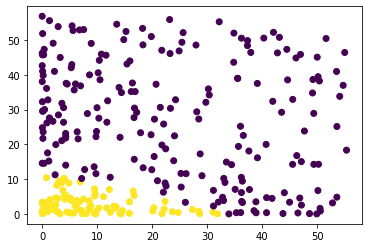

In [6]:
X_train[:,0] = X_train[:,0]**2
X_train[:,1] = X_train[:,1]**2
X_test[:,0] = X_test[:,0]**2
X_test[:,1] = X_test[:,1]**2
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

As per the above plot, logistic should be able to find a good linear decision boundary.

In [7]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train , y_train)
#Test score
score = clf.score(X_train, y_train)
print('Train accuracy : ',score)
#Test score
score = clf.score(X_test, y_test)
print('Test accuracy : ',score)

Train accuracy :  0.9933333333333333
Test accuracy :  1.0


In [8]:
#Train metrics
cr = classification_report(clf.predict(X_train) , y_train , output_dict=True)
pd.DataFrame(cr).transpose()

,precision,recall,f1-score,support
False,0.995327,0.995327,0.995327,214.000000
True,0.988372,0.988372,0.988372,86.000000
accuracy,0.993333,0.993333,0.993333,0.993333
macro avg,0.991850,0.991850,0.991850,300.000000
weighted avg,0.993333,0.993333,0.993333,300.000000


In [9]:
#Test metrics
cr = classification_report(clf.predict(X_test) , y_test , output_dict=True)
pd.DataFrame(cr).transpose()

,precision,recall,f1-score,support
False,1.0,1.0,1.0,69.0
True,1.0,1.0,1.0,31.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,100.0
weighted avg,1.0,1.0,1.0,100.0


# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [10]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:


Topologically sorting the vertices we have (representing ways from A to F as below given don't have really good 2-d representation) :<br>
A -> C -> F <br>
A -> B -> D -> F <br>
A -> B -> E -> F <br>
A -> B -> E -> C -> F <br>

Following all the above directions, lets visit the nodes in the following topologically sorted order : A , B , D, E, C, F 
This means child-parent relationships are as follows :
- A Starting node
- B : Parent A
- C : Parents A, E
- D : Parent B
- E : Parent B
- F : Parents D, E, F

The joint probability distribution factorizes as following wrt this graph :
$$P(A) * P(B|A) *  P(D|B)  * P(E|B) *  P(C|E,A) *  P(F|C,D,E)$$

# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer a :

### Diabetes

In [11]:
# Pima Diabetes dataset, for Section B only
import copy
def load_diabetes():
    df = pd.read_csv('diabetes-2.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

X, y = load_diabetes()
X_copy = copy.deepcopy(X)
y_copy = copy.deepcopy(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_test_copy = copy.deepcopy(X_test)
y_test_copy = copy.deepcopy(y_test)

In [12]:
def run_Models(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test , str_ = 'diabetes'):
    
    #RandomForest
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.linear_model import LogisticRegression
    classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100)
    classifier_rf.fit(X_train, y_train.values.ravel())
    # checking the score on train
    rf_train_acc = classifier_rf.score(X_train,y_train)
    # checking the score on test
    rf_test_acc = classifier_rf.score(X_test,y_test)
    #Classification Report on train
    cr = classification_report(classifier_rf.predict(X_train) , y_train , output_dict=True)
    rf_train_f1 = pd.DataFrame(cr).transpose()['f1-score'][1]
    #Classification Report on test
    cr = classification_report(classifier_rf.predict(X_test) , y_test , output_dict=True)
    rf_test_f1 = pd.DataFrame(cr).transpose()['f1-score'][1]
    #Fit MLP - default hyperparams
    clf_MLP = MLPClassifier(random_state=1,hidden_layer_sizes=(15, 10, 5))
    clf_MLP.fit(X_train, y_train.values.ravel())
    # checking the score on train
    mlp_train_acc = clf_MLP.score(X_train,y_train)
    # checking the score on test
    mlp_test_acc = clf_MLP.score(X_test,y_test)
    #Classification Report on train
    cr = classification_report(clf_MLP.predict(X_train) , y_train , output_dict=True)
    mlp_train_f1 = pd.DataFrame(cr).transpose()['f1-score'][1]
    #Classification Report on test
    cr = classification_report(clf_MLP.predict(X_test) , y_test , output_dict=True)
    mlp_test_f1 = pd.DataFrame(cr).transpose()['f1-score'][1]
    #Logit
    clf_LR = LogisticRegression()
    clf_LR.fit(X_train, y_train.values.ravel())
    # checking the score on train
    lr_train_acc = clf_LR.score(X_train,y_train)
    # checking the score on test
    lr_test_acc = clf_LR.score(X_test,y_test)
    #Classification Report on train
    cr = classification_report(clf_LR.predict(X_train) , y_train , output_dict=True)
    lr_train_f1 = pd.DataFrame(cr).transpose()['f1-score'][1]
    #Classification Report on test
    cr = classification_report(clf_LR.predict(X_test) , y_test , output_dict=True)
    lr_test_f1 = pd.DataFrame(cr).transpose()['f1-score'][1]
    #Table
    results = []
    results.append(['RF',str_+' Train',rf_train_acc,rf_train_f1])
    results.append(['RF',str_+' Test',rf_test_acc,rf_test_f1])

    results.append(['MLP',str_+' Train',mlp_train_acc,mlp_train_f1])
    results.append(['MLP',str_+' Test',mlp_test_acc,mlp_test_f1])

    results.append(['LR',str_+' Train',lr_train_acc,lr_train_f1])
    results.append(['LR',str_+' Test',lr_test_acc,lr_test_f1])
    return [pd.DataFrame(results , columns = ['Algorithm' ,'Data','Accuracy','F1'] ),classifier_rf,clf_MLP,clf_LR ] 

In [13]:
results_df1,classifier_rf,clf_MLP,clf_LR = run_Models()
results_df1

/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Algorithm,Data,Accuracy,F1
0,RF,diabetes Train,0.867704,0.786164
1,RF,diabetes Test,0.775591,0.645963
2,MLP,diabetes Train,0.735409,0.564103
3,MLP,diabetes Test,0.732283,0.540541
4,LR,diabetes Train,0.780156,0.654434
5,LR,diabetes Test,0.748031,0.627907


### Adult

In [14]:
# adult census dataset, for Section A and Section B
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X, y = load_adult()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
results_df2,classifier_rf2,clf_MLP2,clf_LR2 = run_Models(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test ,str_ = 'adult')
results_df2

/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Algorithm,Data,Accuracy,F1
0,RF,adult Train,0.846069,0.598613
1,RF,adult Test,0.846268,0.586793
2,MLP,adult Train,0.798671,0.430941
3,MLP,adult Test,0.803834,0.429345
4,LR,adult Train,0.793537,0.366169
5,LR,adult Test,0.798902,0.373078


In [16]:
results_df = pd.concat([results_df1,results_df2])
results_df

,Algorithm,Data,Accuracy,F1
0,RF,diabetes Train,0.867704,0.786164
1,RF,diabetes Test,0.775591,0.645963
2,MLP,diabetes Train,0.735409,0.564103
3,MLP,diabetes Test,0.732283,0.540541
4,LR,diabetes Train,0.780156,0.654434
5,LR,diabetes Test,0.748031,0.627907
0,RF,adult Train,0.846069,0.598613
1,RF,adult Test,0.846268,0.586793
2,MLP,adult Train,0.798671,0.430941
3,MLP,adult Test,0.803834,0.429345


## Answer b :

In [17]:
from sklearn.calibration import calibration_curve
#Diabetes
rf_y, rf_x = calibration_curve(y_copy.values.ravel(), classifier_rf.predict_proba(X_copy)[:,1], n_bins=12)
mlp_y, mlp_x = calibration_curve(y_copy.values.ravel(), clf_MLP.predict_proba(X_copy)[:,1], n_bins=12)
logreg_y, logreg_x = calibration_curve(y_copy.values.ravel(), clf_LR.predict_proba(X_copy)[:,1], n_bins=12)

#Adult
rf_y2, rf_x2 = calibration_curve(y.values.ravel(), classifier_rf2.predict_proba(X)[:,1], n_bins=12)
mlp_y2, mlp_x2 = calibration_curve(y.values.ravel(), clf_MLP2.predict_proba(X)[:,1], n_bins=12)
logreg_y2, logreg_x2 = calibration_curve(y.values.ravel(), clf_LR2.predict_proba(X)[:,1], n_bins=12)

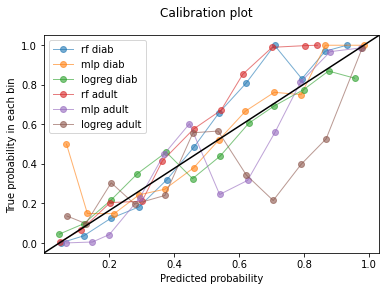

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these six lines are calibration curves
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf diab',alpha=0.6)

plt.plot(mlp_x, mlp_y, marker='o', linewidth=1, label='mlp diab',alpha=0.6)

plt.plot(logreg_x,logreg_y, marker='o', linewidth=1, label='logreg diab',alpha=0.6)


plt.plot(rf_x2, rf_y2, marker='o', linewidth=1, label='rf adult',alpha=0.6)

plt.plot(mlp_x2, mlp_y2, marker='o', linewidth=1, label='mlp adult',alpha=0.6)

plt.plot(logreg_x2,logreg_y2, marker='o', linewidth=1, label='logreg adult',alpha=0.6)


# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

## Answer c :

In [19]:
#!pip install dice-ml
import dice_ml

In [20]:
from dice_ml.utils import helpers  # helper functions
from sklearn.compose import ColumnTransformer

In [21]:
dt_diab = pd.concat([X_copy,y_copy],axis=1)
dt_diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
cols_diab = dt_diab.columns[~(dt_diab.columns.values == 'Outcome')]
cols_diab.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [23]:
dt_adult = pd.concat([X,y],axis=1)
dt_adult.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_

In [24]:
d1 = dice_ml.Data(dataframe=dt_diab, continuous_features=list(cols_diab.values), outcome_name='Outcome')
d2 = dice_ml.Data(dataframe=dt_adult, continuous_features=['age', 'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week'], outcome_name='target')

In [25]:
d1

In [26]:
# provide the trained ML model to DiCE's model object
backend = 'sklearn'
rf1 = dice_ml.Model(model=classifier_rf, backend=backend)
mlp1 = dice_ml.Model(model=clf_MLP, backend=backend)
lr1 = dice_ml.Model(model=clf_LR, backend=backend)

rf2 = dice_ml.Model(model=classifier_rf2, backend=backend)
mlp2 = dice_ml.Model(model=clf_MLP2, backend=backend)
lr2 = dice_ml.Model(model=clf_LR2, backend=backend)

### Random DiCE

In [27]:
# initiate DiCE
rndm_dice1 = dice_ml.Dice(d1, rf1, method="random")
rndm_dice2 = dice_ml.Dice(d1, mlp1, method="random")
rndm_dice3 = dice_ml.Dice(d1, lr1, method="random")
rndm_dice4 = dice_ml.Dice(d2, rf2, method="random")
rndm_dice5 = dice_ml.Dice(d2, mlp2, method="random")
rndm_dice6 = dice_ml.Dice(d2, lr2, method="random")

In [28]:
q1 = X_test_copy[0:50]
q2 = X_test[0:50]

In [29]:
# generate counterfactuals
dice_rndm_CF1 = rndm_dice1.generate_counterfactuals(q1, total_CFs=5, desired_class="opposite", verbose=False)
dice_rndm_CF2 = rndm_dice2.generate_counterfactuals(q1, total_CFs=5, desired_class="opposite", verbose=False)
dice_rndm_CF3 = rndm_dice3.generate_counterfactuals(q1, total_CFs=5, desired_class="opposite", verbose=False)
dice_rndm_CF4 = rndm_dice4.generate_counterfactuals(q2, total_CFs=5, desired_class="opposite", verbose=False)
dice_rndm_CF5 = rndm_dice5.generate_counterfactuals(q2, total_CFs=5, desired_class="opposite", verbose=False)
dice_rndm_CF6 = rndm_dice6.generate_counterfactuals(q2, total_CFs=5, desired_class="opposite", verbose=False)

100%|██████████| 50/50 [00:05<00:00,  9.21it/s]


Below is a visual summary of the counterfactual instances generated for each test data instance. The metrics ascertaining how good these CFs are generated will be created next. 

Metrics to test are :
- Validity : % of CFs that actually end up across the decision boundary
- Sparsity : Changes in CFs wrt Xs
- Proximity : Distance between CFs vs Xs
- Diversity : Distance amidst CFs
- In-distributionness : Whether CFs look as part of train set distribution

In general we need, high validity, high sparsity, high proximity, higher diversity but not at the price of lower in-distributionness.

In [30]:
dice_rndm_CF1.visualize_as_dataframe(show_only_changes=True)

Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.43,43,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,155.0,-,-,400.0,-,-,-,1.0
1,17.0,-,-,-,740.0,-,-,-,1.0
2,12.0,51.0,-,-,-,-,-,-,1.0
3,-,-,113.0,91.0,-,-,-,-,1.0
4,-,-,111.0,76.0,-,-,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,112,75,32,0,35.7,0.148,21,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,197.0,52.0,-,-,36.00000000000001,-,-,1.0
1,-,197.0,-,-,-,36.00000000000001,-,-,1.0
2,-,179.0,-,-,-,36.00000000000001,-,-,1.0
3,-,170.0,-,-,-,36.00000000000001,-,-,1.0
4,-,175.0,-,-,543.0,36.00000000000001,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,108,64,0,0,30.8,0.158,21,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,179.0,-,-,-,31.000000000000004,-,-,1.0
1,-,168.0,-,-,-,31.000000000000004,-,-,1.0
2,-,195.0,-,-,-,31.000000000000004,-,30.0,1.0
3,-,176.0,-,-,-,42.5,-,-,1.0
4,-,167.0,-,-,-,31.000000000000004,0.353,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,107,80,0,0,24.6,0.856,34,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,-,-,-,49.4,-,-,1.0
1,-,-,-,-,-,55.9,0.552,-,1.0
2,-,-,-,-,-,33.6,-,-,1.0
3,-,-,-,33.0,-,42.4,-,-,1.0
4,-,-,-,-,168.0,65.4,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,136,90,0,0,29.9,0.21,50,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,-,-,350.0,61.8,-,-,1.0
1,-,144.0,-,-,-,30.0,-,-,1.0
2,-,-,-,-,-,30.0,0.384,-,1.0
3,-,177.0,-,-,-,30.0,-,-,1.0
4,-,-,-,-,531.0,30.0,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,103,72,32,190,37.7,0.324,55,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,14.0,-,-,-,407.0,38.00000000000001,-,-,1.0
1,-,-,-,-,-,38.00000000000001,1.741,-,1.0
2,-,173.0,-,-,650.0,38.00000000000001,-,-,1.0
3,-,-,-,-,-,38.00000000000001,0.804,-,1.0
4,-,-,-,-,441.0,38.00000000000001,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,71,48,18,76,20.4,0.323,22,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,180.0,-,-,-,21.000000000000007,-,75.0,1.0
1,17.0,199.0,-,-,-,21.000000000000007,-,-,1.0
2,-,166.0,-,-,-,52.3,-,-,1.0
3,-,197.0,-,84.0,-,21.000000000000007,-,-,1.0
4,-,164.0,-,-,-,21.000000000000007,-,58.0,1.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,117,0,0,0,33.8,0.932,44,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,68.0,-,-,34.0,-,-,0.0
1,-,-,-,-,-,8.2,-,-,0.0
2,-,-,-,-,-,34.0,1.903,-,0.0
3,-,109.0,-,-,-,20.5,-,-,0.0
4,-,-,-,-,-,18.7,-,-,0.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,154,72,29,126,31.3,0.338,37,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,83.0,-,-,-,32.00000000000001,-,-,0.0
1,-,-,-,-,-,24.1,-,-,0.0
2,-,-,-,-,-,11.6,0.347,-,0.0
3,-,-,-,-,-,4.6,-,53.0,0.0
4,-,-,-,59.0,-,12.2,-,-,0.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,147,78,0,0,33.7,0.218,65,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,30.0,-,-,815.0,34.00000000000001,-,-,0.0
1,-,11.0,-,-,766.0,34.00000000000001,-,-,0.0
2,-,117.0,-,-,-,8.6,-,-,0.0
3,-,97.0,-,-,339.0,34.00000000000001,-,-,0.0
4,-,-,-,-,-,12.0,-,-,0.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,10,111,70,27,0,27.5,0.141,40,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,147.0,-,-,-,64.8,-,-,1.0
1,-,170.0,-,-,-,28.000000000000007,-,-,1.0
2,-,-,-,-,175.0,28.000000000000007,2.337,-,1.0
3,-,-,-,-,-,52.2,1.354,-,1.0
4,-,177.0,-,-,-,28.000000000000007,-,55.0,1.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,179,95,31,0,34.2,0.164,60,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,46.0,83.0,-,-,35.000000000000014,-,-,0.0
1,-,119.0,-,-,38.0,35.000000000000014,-,-,0.0
2,-,10.0,-,98.0,-,35.000000000000014,-,-,0.0
3,-,66.0,-,-,-,42.6,-,-,0.0
4,-,57.0,111.0,-,-,35.000000000000014,-,-,0.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,148,60,27,318,30.9,0.15,29,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,-,57.0,-,31.0,2.017,-,1.0
1,17.0,-,-,-,-,31.0,1.138,-,1.0
2,-,-,-,-,-,31.0,1.591,-,1.0
3,14.0,-,-,-,-,31.0,-,77.0,1.0
4,-,-,-,47.0,-,31.0,-,50.0,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,96,74,18,67,33.6,0.997,43,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,-,72.0,690.0,34.00000000000001,-,-,1.0
1,-,-,-,55.0,707.0,34.00000000000001,-,-,1.0
2,-,164.0,-,-,-,67.0,-,-,1.0
3,8.0,-,-,90.0,-,34.00000000000001,-,-,1.0
4,-,160.0,-,-,-,26.7,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,88,58,26,16,28.4,0.766,22,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,17.0,197.0,-,-,-,29.000000000000007,-,-,1.0
1,12.0,197.0,-,-,-,29.000000000000007,-,-,1.0
2,8.0,194.0,-,-,-,29.000000000000007,-,-,1.0
3,-,192.0,-,-,-,29.000000000000007,-,26.0,1.0
4,-,196.0,-,95.0,-,29.000000000000007,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,125,50,40,167,33.3,0.962,28,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,153.0,-,-,-,34.00000000000001,-,-,1.0
1,-,160.0,-,-,-,34.00000000000001,-,59.0,1.0
2,14.0,-,-,-,-,34.00000000000001,0.9990000000000395,-,1.0
3,11.0,-,-,73.0,-,34.00000000000001,-,-,1.0
4,-,166.0,-,-,-,34.00000000000001,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,84,72,32,0,37.2,0.267,28,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,199.0,-,-,-,38.000000000000014,-,-,1.0
1,-,185.0,-,92.0,-,38.000000000000014,-,-,1.0
2,-,150.0,-,-,832.0,38.000000000000014,-,-,1.0
3,-,188.0,-,-,-,38.000000000000014,-,-,1.0
4,-,171.0,27.0,-,-,38.000000000000014,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,86,68,28,71,30.2,0.364,24,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,178.0,-,-,-,61.7,-,-,1.0
1,-,178.0,-,43.0,-,31.00000000000001,-,-,1.0
2,-,185.0,-,88.0,-,31.00000000000001,-,-,1.0
3,-,190.0,-,-,-,43.5,-,-,1.0
4,-,176.0,-,-,-,36.4,-,-,1.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,183,0,0,0,28.4,0.212,36,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,16.0,19.0,-,-,-,29.000000000000007,-,-,0.0
1,9.0,19.0,-,-,-,29.000000000000007,-,-,0.0
2,-,151.0,-,17.0,-,29.000000000000007,-,-,0.0
3,-,28.0,-,-,-,29.000000000000007,-,-,0.0
4,-,106.0,-,-,-,29.000000000000007,-,-,0.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,140,65,26,130,42.6,0.431,24,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9.0,-,76.0,-,-,43.00000000000001,-,-,1.0
1,-,-,71.0,73.0,-,43.00000000000001,-,-,1.0
2,-,149.0,-,2.0,-,43.00000000000001,-,-,1.0
3,-,-,56.0,-,-,43.00000000000001,-,45.0,1.0
4,-,-,-,92.0,783.0,43.00000000000001,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,104,74,0,0,28.8,0.153,48,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,188.0,-,-,-,29.00000000000001,-,-,1.0
1,-,155.0,-,-,-,29.000000000000004,-,-,1.0
2,-,162.0,-,-,-,29.000000000000004,-,53.0,1.0
3,-,198.0,-,-,-,29.000000000000004,-,-,1.0
4,-,188.0,-,20.0,-,29.000000000000004,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,88,78,29,76,32.0,0.365,29,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,189.0,-,-,-,-,0.372,-,1.0
1,-,177.0,-,3.0,-,-,-,-,1.0
2,-,178.0,-,-,-,-,-,-,1.0
3,-,194.0,101.0,-,-,-,-,-,1.0
4,-,156.0,-,-,-,-,1.423,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,13,106,72,54,0,36.6,0.178,45,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,10.0,-,-,-,660.0,37.00000000000001,-,-,1.0
1,-,-,-,-,618.0,37.00000000000001,-,68.0,1.0
2,-,-,-,-,-,37.00000000000001,1.953,-,1.0
3,-,-,-,-,-,37.00000000000001,1.835,-,1.0
4,-,-,-,-,600.0,52.9,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,96,64,27,87,33.2,0.289,21,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,171.0,112.0,-,-,34.000000000000014,-,-,1.0
1,-,188.0,114.0,-,-,34.000000000000014,-,-,1.0
2,-,166.0,-,-,40.0,34.000000000000014,-,-,1.0
3,-,172.0,26.0,-,-,34.000000000000014,-,-,1.0
4,8.0,196.0,-,-,-,34.000000000000014,-,-,1.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,10,129,76,28,122,35.9,0.28,39,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,64.0,-,-,-,36.0,-,29.0,0.0
1,-,104.0,-,-,-,43.7,-,-,0.0
2,-,-,-,-,-,16.9,2.007,-,0.0
3,-,95.0,-,-,-,30.3,-,-,0.0
4,2.0,-,-,-,-,6.2,-,-,0.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,184,84,33,0,35.5,0.355,41,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9.0,15.0,-,-,-,36.00000000000001,-,-,0.0
1,-,6.0,-,-,-,36.00000000000001,1.492,-,0.0
2,-,115.0,-,-,-,36.00000000000001,-,-,0.0
3,-,120.0,-,-,-,36.00000000000001,-,-,0.0
4,-,44.0,-,-,-,36.00000000000001,2.102,-,0.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,109,60,27,0,25.0,0.206,27,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,169.0,-,-,-,-,-,-,1.0
1,-,182.0,117.0,-,-,-,-,-,1.0
2,-,190.0,-,-,467.0,-,-,-,1.0
3,-,190.0,-,-,-,-,-,-,1.0
4,-,159.0,-,-,-,-,0.315,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,100,74,12,46,19.5,0.149,28,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,10.0,184.0,-,-,-,20.000000000000007,-,-,1.0
1,-,180.0,-,-,-,20.000000000000007,-,47.0,1.0
2,-,172.0,-,-,-,20.000000000000007,-,72.0,1.0
3,-,196.0,54.0,-,-,20.000000000000007,-,-,1.0
4,-,169.0,-,-,-,20.000000000000007,-,56.0,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,102,86,36,120,45.5,0.127,23,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,196.0,-,-,-,46.00000000000001,-,-,1.0
1,-,161.0,-,-,231.0,46.00000000000001,-,-,1.0
2,-,184.0,-,-,-,46.00000000000001,-,-,1.0
3,-,186.0,-,-,-,46.00000000000001,-,-,1.0
4,-,196.0,-,-,549.0,46.00000000000001,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,89,74,16,85,30.4,0.551,38,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,137.0,-,-,-,31.000000000000007,-,-,1.0
1,-,147.0,-,-,-,31.000000000000007,0.653,-,1.0
2,-,181.0,35.0,-,-,31.000000000000007,-,-,1.0
3,16.0,171.0,-,-,-,31.000000000000007,-,-,1.0
4,-,187.0,-,-,-,31.000000000000007,-,-,1.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,162,76,56,100,53.2,0.759,25,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,104.0,-,69.0,-,54.000000000000014,-,-,0.0
1,-,44.0,9.0,-,-,54.000000000000014,-,-,0.0
2,-,73.0,-,-,-,54.000000000000014,-,-,0.0
3,-,5.0,-,-,-,54.000000000000014,-,-,0.0
4,-,101.0,-,-,-,48.0,-,-,0.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,146,78,0,0,38.5,0.52,67,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,60.0,-,52.0,-,39.00000000000001,-,-,0.0
1,-,49.0,-,-,-,39.00000000000001,-,-,0.0
2,-,38.0,-,-,-,39.00000000000001,-,-,0.0
3,-,123.0,-,-,-,39.00000000000001,-,29.0,0.0
4,-,15.0,-,-,-,39.00000000000001,1.644,-,0.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,184,78,39,277,37.0,0.264,31,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,18.0,-,-,691.0,-,-,-,0.0
1,12.0,20.0,-,-,-,-,-,-,0.0
2,-,89.0,-,-,-,-,-,-,0.0
3,-,37.0,-,-,-,-,-,-,0.0
4,-,86.0,-,-,-,-,-,-,0.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,167,0,0,0,32.3,0.839,30,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,84.0,-,-,-,33.00000000000001,-,-,0.0
1,-,90.0,-,-,-,33.00000000000001,-,-,0.0
2,-,26.0,14.0,-,-,33.00000000000001,-,-,0.0
3,-,63.0,-,-,-,33.00000000000001,-,-,0.0
4,-,105.0,80.0,-,-,33.00000000000001,-,-,0.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,109,92,0,0,42.7,0.845,54,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,112.0,-,-,-,43.00000000000001,-,-,1.0
1,9.0,-,-,-,-,42.999999999999986,-,-,1.0
2,-,-,-,-,408.0,43.00000000000001,-,-,1.0
3,-,130.0,-,-,-,43.00000000000001,-,-,1.0
4,17.0,-,-,-,-,43.00000000000001,2.052,-,1.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,152,78,34,171,34.2,0.893,33,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,-,-,-,19.9,-,-,0.0
1,-,-,-,-,-,12.4,-,-,0.0
2,-,-,-,-,-,9.2,-,-,0.0
3,-,-,-,-,-,20.7,-,50.0,0.0
4,-,-,-,-,-,3.4,-,77.0,0.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,197,70,99,0,34.7,0.575,62,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,30.0,-,-,-,61.5,-,-,0.0
1,-,22.0,-,-,-,35.00000000000001,-,35.0,0.0
2,-,30.0,78.0,-,-,35.00000000000001,-,-,0.0
3,-,102.0,-,-,-,35.00000000000001,-,-,0.0
4,-,30.0,-,-,-,35.00000000000001,-,-,0.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,109,88,30,0,32.5,0.855,38,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,-,-,810.0,33.00000000000001,-,-,1.0
1,-,-,-,82.0,-,54.3,-,-,1.0
2,10.0,-,-,-,93.0,33.00000000000001,-,-,1.0
3,-,-,-,-,675.0,48.9,-,-,1.0
4,12.0,-,63.0,-,-,33.00000000000001,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,12,121,78,17,0,26.5,0.259,62,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,165.0,-,-,-,27.000000000000007,1.162,-,1.0
1,0.0,-,-,-,-,51.5,-,-,1.0
2,-,-,-,28.0,-,48.7,-,-,1.0
3,-,182.0,-,85.0,-,27.000000000000007,-,-,1.0
4,6.0,191.0,-,-,-,27.000000000000007,-,-,1.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,131,0,0,0,43.2,0.27,26,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,142.0,55.0,-,-,44.000000000000014,-,-,0.0
1,-,-,-,-,135.0,44.000000000000014,-,-,0.0
2,-,-,-,-,221.0,44.000000000000014,-,-,0.0
3,-,-,-,-,-,15.9,-,-,0.0
4,-,-,-,-,-,28.9,-,74.0,0.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,85,58,22,49,27.8,0.306,28,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,14.0,156.0,-,-,-,28.000000000000004,-,-,1.0
1,-,172.0,-,-,27.0,28.000000000000004,-,-,1.0
2,-,194.0,-,-,-,28.000000000000004,-,-,1.0
3,-,195.0,-,-,-,28.000000000000004,-,78.0,1.0
4,-,164.0,-,-,-,28.000000000000004,0.771,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,135,54,0,0,26.7,0.687,62,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,-,-,-,37.7,-,-,1.0
1,17.0,-,-,-,-,54.3,-,-,1.0
2,-,-,-,-,-,58.4,-,28.0,1.0
3,-,195.0,-,-,140.0,27.000000000000004,-,-,1.0
4,-,-,-,-,-,29.9,0.72,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,109,75,26,0,36.0,0.546,60,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,164.0,-,-,-,-,-,-,1.0
1,-,177.0,-,-,-,-,-,-,1.0
2,-,-,-,-,-,63.0,0.629,-,1.0
3,-,150.0,-,96.0,-,-,-,-,1.0
4,-,140.0,-,-,-,-,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,13,104,72,0,0,31.2,0.465,38,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,-,-,452.0,32.00000000000001,-,55.0,1.0
1,-,147.0,-,-,-,32.00000000000001,-,-,1.0
2,-,133.0,-,-,-,32.00000000000001,-,-,1.0
3,-,-,-,-,570.0,32.00000000000001,-,-,1.0
4,-,-,-,-,576.0,32.00000000000001,0.954,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,92,92,0,0,19.9,0.188,28,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,173.0,-,-,-,20.0,1.021,-,1.0
1,1.0,162.0,-,-,-,20.0,-,-,1.0
2,8.0,184.0,-,-,-,20.0,-,-,1.0
3,-,174.0,-,-,-,20.0,-,-,1.0
4,-,187.0,-,-,-,0.6,-,-,1.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,158,76,36,245,31.6,0.851,28,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,-,-,-,14.6,-,81.0,0.0
1,-,122.0,-,-,-,32.00000000000001,-,-,0.0
2,-,93.0,59.0,-,-,32.00000000000001,-,-,0.0
3,-,7.0,-,-,6.0,32.00000000000001,-,-,0.0
4,14.0,23.0,-,-,-,32.00000000000001,-,-,0.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,111,72,47,207,37.1,1.39,56,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,120.0,-,-,38.000000000000014,-,30.0,0.0
1,-,-,-,-,-,16.8,0.238,-,0.0
2,-,-,-,-,-,6.3,0.845,-,0.0
3,-,57.0,-,-,-,38.000000000000014,-,-,0.0
4,-,-,-,-,97.0,38.000000000000014,-,-,0.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,95,72,33,0,37.7,0.37,27,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,145.0,-,-,-,38.00000000000001,-,-,1.0
1,-,166.0,-,-,379.0,38.00000000000001,-,-,1.0
2,-,187.0,-,-,-,59.4,-,-,1.0
3,-,180.0,-,55.0,-,38.00000000000001,-,-,1.0
4,-,158.0,-,-,-,38.00000000000001,-,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,112,72,0,0,23.6,0.84,58,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,-,-,-,64.7,-,-,1.0
1,-,187.0,-,-,-,1.6,-,-,1.0
2,-,187.0,-,-,-,24.000000000000007,-,-,1.0
3,-,-,53.0,-,-,35.6,-,-,1.0
4,16.0,-,-,-,-,47.1,-,-,1.0


Query instance (original outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,173,78,32,265,46.5,1.159,58,1



Diverse Counterfactual set (new outcome: 0.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,12.0,-,-,-,47.00000000000001,-,-,0.0
1,-,95.0,-,-,-,47.00000000000001,-,-,0.0
2,-,46.0,-,63.0,-,47.00000000000001,-,-,0.0
3,-,72.0,-,-,-,47.00000000000001,1.649,-,0.0
4,-,24.0,-,-,-,47.00000000000001,-,-,0.0


In [31]:
#dice_rndm_CF2.visualize_as_dataframe(show_only_changes=True)

In [32]:
#dice_rndm_CF3.visualize_as_dataframe(show_only_changes=True)

In [33]:
#dice_rndm_CF4.visualize_as_dataframe(show_only_changes=True)

In [34]:
#dice_rndm_CF5.visualize_as_dataframe(show_only_changes=True)

In [35]:
#dice_rndm_CF6.visualize_as_dataframe(show_only_changes=True)

In [36]:
#Metric helper functions

import json  
import operator


def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()


def L1norm(x,y):
    x=np.array(x)
    y=np.array(y)
    p=np.sum((x-y)**2)
    d=np.sqrt(p)
    return d


  
def validity_count(cf = dice_rndm_CF1, test = y_test_copy[0:50]):
    n = 50
    k = 5
    json_string = cf.to_json()
    dict_1 = json.loads(json_string)    # obj now contains a dict of the data

    test_mul = list(np.repeat(np.array(test),5))

    sets = []
    for i in range(n):
        for j in range(k):
        
            sets.append(dict_1['cfs_list'][i][j])
    k_ = len(sets)
    new_sets = []
    for i in range(k_):
    
        if(sets[i][-1] >= 0.5 and test_mul[i] < 0.5 ):
            new_sets.append(sets[i])
        elif(sets[i][-1] < 0.5 and test_mul[i] >= 0.5 ):
            new_sets.append(sets[i])
            
    unique_C = [list(x) for x in set(tuple(x) for x in new_sets)]

    return (len(unique_C)/k_)


validity_count()

0.74

In [37]:
def sparsity_metric(cf = dice_rndm_CF1 , Xtest = X_test_copy[0:50]):
    n = 50
    k = 5
    json_string = cf.to_json()
    dict_1 = json.loads(json_string) 
    Xtest2 = [[Xtest.iloc[i,:].values]*5 for i in range(len(Xtest)) ]
    sets_CF = []
    sets_test = []
    for i in range(n):
        for j in range(k):
            sets_CF.append(dict_1['cfs_list'][i][j])
            sets_test.append(Xtest2[i][j])
    df_CF = pd.DataFrame(sets_CF).iloc[:,:-1]
    df_test = pd.DataFrame(sets_test)
    return (1 - (sum(df_CF != df_test)/(n*k)))

sparsity_metric()

0.888

In [38]:
def proximity_metric(cf = dice_rndm_CF1 , Xtest = X_test_copy[0:50]):
    n = 50
    k = 5
    json_string = cf.to_json()
    dict_1 = json.loads(json_string) 
    Xtest2 = [[Xtest.iloc[i,:].values]*5 for i in range(len(Xtest)) ]
    sets_CF = []
    sets_test = []
    for i in range(n):
        for j in range(k):
            sets_CF.append(dict_1['cfs_list'][i][j])
            sets_test.append(Xtest2[i][j])
    df_CF = pd.DataFrame(sets_CF).iloc[:,:-1]
    df_test = pd.DataFrame(sets_test)
    d = len(df_test.columns)
    df_test2 = abs(df_CF - df_test)

    df_test2.loc[:,0:d] = df_test2.loc[:,0:d].div(df_test2.mad(axis=1), axis=0)
    df_test2 = df_test2/d
    return (-1*df_test2.sum(axis=1).mean())
   
    
proximity_metric()

-0.6232732191201363

In [39]:
def evalMADdist(l1,l2):

    mad_ = pd.Series(l2).mad()
    l_ = list(map(operator.sub, l1, l2))
    l_ = list(map(abs, l_))
    l_ = list(map(lambda x : x/mad_,l_))
    dist_2 = sum(l_)/len(l_)
    return (dist_2)


def diversity_metric(cf = dice_rndm_CF1):
    n = 50
    k = 5
    json_string = cf.to_json()
    dict_1 = json.loads(json_string) 
    sets_CF = []
    for i in range(n):
        for j in range(k):
            sets_CF.append(dict_1['cfs_list'][i][j])

    unique_C = [list(x) for x in set(tuple(x) for x in sets_CF)]
    dist_pairwise = []
    for i in range(len(unique_C)-1):
        for j in range((i+1) , len(unique_C)):
            l1 = unique_C[i]
            l2 = unique_C[j]
            dist_pairwise.append(evalMADdist(l1=l1,l2=l2))
    return sum(dist_pairwise)/(len(unique_C)**2)

diversity_metric()   

0.40816479535470523

In [40]:
# import operator
# cf = dice_rndm_CF1
# n = 50
# k = 5
# json_string = cf.to_json()
# dict_1 = json.loads(json_string) 
# sets_CF = []
# for i in range(n):
#     for j in range(k):
#         sets_CF.append(dict_1['cfs_list'][i][j])
        
# unique_C = [list(x) for x in set(tuple(x) for x in sets_CF)]





In [41]:
# # import itertools
# # from scipy.spatial.distance import pdist

# import random


# cf = dice_rndm_CF1
# n = 50
# k = 5
# json_string = cf.to_json()
# dict_1 = json.loads(json_string) 
# sets_CF = []
# for i in range(n):
#     for j in range(k):
#         sets_CF.append(dict_1['cfs_list'][i][j])
#         sets_test.append(Xtest2[i][j])
# df_CF = pd.DataFrame(sets_CF).iloc[:,:-1]

# # dist_ = pd.DataFrame(itertools.combinations(df_CF.index, 2), columns=['i','j'])
# # dist_['dist'] = pdist(df_CF, 'euclid')
# # mat_ = dist_.pivot(index='i', columns='j', values='dist')
# # mat_
# A_mat = np.zeros((len(df_CF),len(df_CF)))
# for i in range(len(df_CF)):
#     for j in range(len(df_CF)):
#         if(i == j):
#             A_mat[i,j] = 0.01*random.random()
#         else:
#             A_mat[i,j] = 1/(1+L1norm(list(df_CF.iloc[i,:]),list(df_CF.iloc[j,:])))
# A_mat  = np.matrix(A_mat)
# # determinant_recursive(A_mat)
# # (sign, logdet) = np.linalg.slogdet(A_mat)
# # determinant = np.exp(logdet)
# np.linalg.det(A_mat)
